## PhoREAL / SlideRule Example

Demonstrate running the PhoREAL algorithm in SlideRule to produce canopy metrics over the Grand Mesa, Colorado region.

#### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore") # suppress warnings

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import geopandas
import logging
import sliderule
from sliderule import icesat2

#### Initialize Client
* Organization currently set to "utexas"; if you want to be a member of the utexas SlideRule organization, make a request through the SlideRule provisioning system (https://ps.slideruleearth.io); otherwise, remove the organization parameter to default to the public SlideRule cluster.
* Notebook only processes one granule, so one desired_node is sufficient

In [3]:
icesat2.init("slideruleearth.io", verbose=True, loglevel=logging.INFO)

Setting URL to slideruleearth.io
Login status to slideruleearth.io/sliderule: failure
Client (version (4, 6, 4)) is out of date with the server (version (4, 8, 3))


#### Processing parameters
* 100m segments stepped every 100m
* Subsetted to the Grand Mesa region
* Time range is one day, Nov 14, 2019
* Only processing ground, canopy, and top of canopy photons
* Request the "h_dif_ref" variable as an ancillary field to be included in the results
* Running PhoREAL algorithm using a binsize of 1m, and geolocating each segment at the center of the segment
* Sending reconstructed waveforms along with metrics (for diagnostics and demonstration purposes only)

In [23]:
# Specify region of interest from geojson
poly_fn = '/Users/titus/BSU/remote_sensing/tutorials/icesat2/karina/RCEW-outline_WGS84.geojson'
region = sliderule.toregion(poly_fn)["poly"] # symplify 
region

parms = {
    "poly": region,
    # "poly": sliderule.toregion('shapefiles/grandmesa.geojson')['poly'],
    # "t0": '2019-11-14T00:00:00Z',
    # "t1": '2019-11-15T00:00:00Z',
    "srt": icesat2.SRT_LAND,
    "len": 100,
    "res": 100,
    "pass_invalid": True, 
    "atl08_class": ["atl08_ground", "atl08_canopy", "atl08_top_of_canopy"],
    "atl08_fields": ["h_dif_ref"],
    "phoreal": {"binsize": 1.0, "geoloc": "center", "use_abs_h": False, "send_waveform": True}
}

#### Make Atl08 Request

In [24]:
# sliderule.toregion('shapefiles/grandmesa.geojson')['poly']
# region

In [25]:
atl08 = icesat2.atl08p(parms, keep_id=True)

request <AppServer.52046> retrieved 91 resources from CMR
Starting proxy for atl08 to process 91 resource(s) with 18 thread(s)
request <AppServer.52047> processing initialized on ATL03_20220422094636_04631502_006_02.h5 ...
request <AppServer.52049> processing initialized on ATL03_20210223181044_09431006_006_01.h5 ...
request <AppServer.52048> processing initialized on ATL03_20230217192206_09051802_006_02.h5 ...
request <AppServer.10525> processing initialized on ATL03_20230220072934_09431806_006_02.h5 ...
request <AppServer.61110> processing initialized on ATL03_20230723001230_05012006_006_02.h5 ...
request <AppServer.61111> processing initialized on ATL03_20210426151429_05011106_006_02.h5 ...
request <AppServer.60602> processing initialized on ATL03_20230720120459_04632002_006_02.h5 ...
request <AppServer.10526> processing initialized on ATL03_20200725160726_04630802_006_01.h5 ...
request <AppServer.61112> processing initialized on ATL03_20221023131349_05011706_006_01.h5 ...
request <

#### Print Resulting GeoDataFrame

In [26]:
atl08

,canopy_openness,gnd_ph_count,x_atc,h_te_median,canopy_h_metrics,solar_elevation,rgt,ph_count,h_mean_canopy,h_min_canopy,...,extent_id,landcover,snowcover,h_canopy,h_max_canopy,geometry,binsize,num_bins,waveform,h_dif_ref
time,,,,,,,,,,,,,,,,,,,,,
2018-11-26 21:09:05.587024896,2.691239,1,2.977189e+08,1570.025391,"(5.9410400390625, 5.9410400390625, 5.941040039...",22.218178,905,9,7.016235,5.104004,...,4075757741153452034,126,2,12.649170,12.649170,POINT (-116.69177 43.16358),1.0,8,"[0.6666666865348816, 0.0, 0.0, 0.0, 0.0, 0.111...",-3.892578
2018-11-26 21:09:05.600674816,17.014700,1,2.976372e+08,1564.271729,"(5.785400390625, 6.784423828125, 6.78442382812...",22.217569,905,42,17.610830,1.882690,...,4075757741153452038,126,2,74.321899,74.321899,POINT (-116.69188 43.16445),1.0,73,"[0.02380952425301075, 0.02380952425301075, 0.0...",-3.892578
2018-11-26 21:09:05.638774784,7.472399,0,2.972878e+08,0.000000,"(5.440673828125, 5.670654296875, 7.45422363281...",22.214966,905,27,14.127288,3.531494,...,4075757741153452050,126,2,32.403931,32.403931,POINT (-116.69221 43.16687),1.0,29,"[0.03703703731298447, 0.03703703731298447, 0.0...",-3.892578
2018-11-26 21:09:05.668974848,NaN,1,2.970735e+08,1415.212646,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22.213369,905,1,NaN,0.000000,...,4075757741153452058,126,2,0.000000,0.000000,POINT (-116.69246 43.1688),1.0,1,[0.0],-3.892578
2018-11-26 21:09:05.683574784,NaN,2,2.969680e+08,1393.308105,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22.212584,905,2,NaN,0.000000,...,4075757741153452062,126,2,0.000000,0.000000,POINT (-116.69258 43.16973),1.0,1,[0.0],-3.892578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-18 05:31:06.891233024,0.536494,9,-9.451199e+08,2062.457275,"(1.776123046875, 1.776123046875, 1.77612304687...",-25.520845,943,18,1.523139,0.830566,...,4246896125795107755,30,1,2.407715,2.407715,POINT (-116.75838 43.06229),1.0,2,"[0.3333333432674408, 0.1666666716337204]",-3.849854
2024-08-18 05:31:06.894583040,1.592548,15,-9.400163e+08,2059.874756,"(1.87890625, 1.87890625, 1.87890625, 1.8789062...",-25.501833,943,36,3.301223,1.073730,...,4246896126868849655,116,1,7.964600,7.964600,POINT (-116.79737 43.06375),1.0,7,"[0.1666666716337204, 0.1388888955116272, 0.111...",-1.006836
2024-08-18 05:31:06.909082880,1.089079,27,-9.401970e+08,2076.219727,"(1.64111328125, 1.64111328125, 1.64111328125, ...",-25.502506,943,58,2.214001,0.745117,...,4246896126868849659,126,1,5.327637,5.327637,POINT (-116.79748 43.06282),1.0,5,"[0.17241379618644714, 0.2586206793785095, 0.05...",-0.517090


#### Plot Canopy Height

<Axes: xlabel='x_atc', ylabel='h_canopy'>

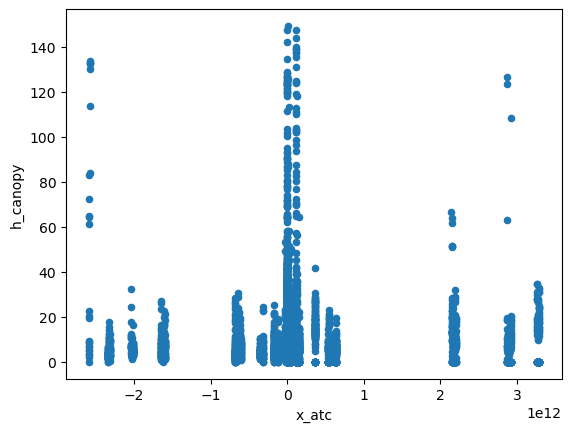

In [27]:
canopy_gt1l = atl08[atl08['gt'] == icesat2.GT1L]
canopy_gt1l.plot.scatter(x='x_atc', y='h_canopy')

#### Plot Landcover

<Axes: >

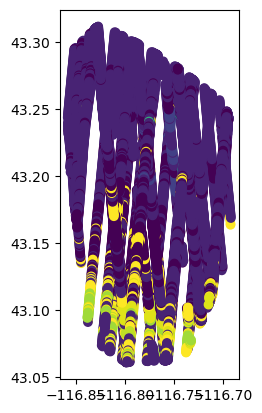

In [28]:
atl08.plot('landcover')

#### Create and Plot 75th percentile Across All Ground Tracks

<Axes: xlabel='x_atc', ylabel='75'>

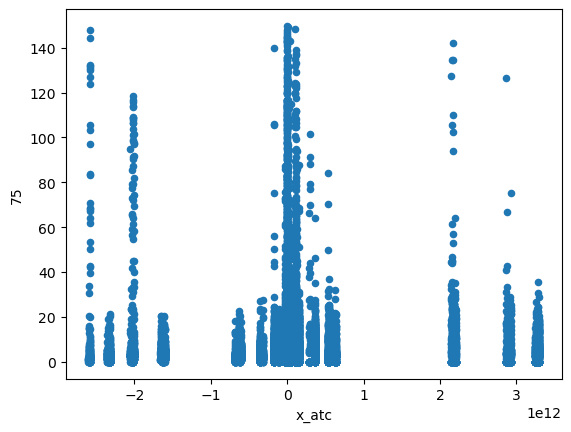

In [29]:
atl08['75'] = atl08.apply(lambda row : row["canopy_h_metrics"][icesat2.P['75']], axis = 1)
atl08.plot.scatter(x='x_atc', y='75')

#### Create Sample Waveform Plots

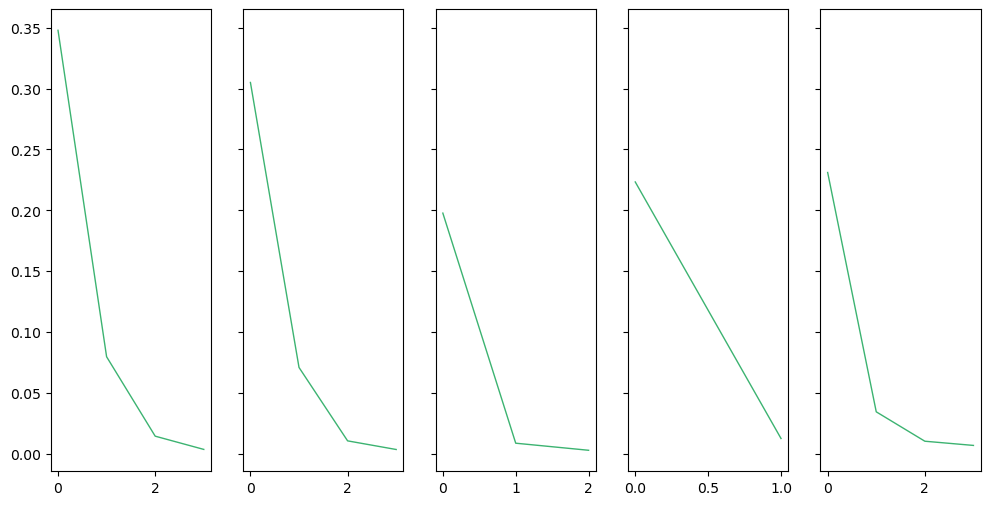

In [30]:
num_plots = 5
waveform_index = [96, 97, 98, 100, 101]
fig,ax = plt.subplots(num=1, ncols=num_plots, sharey=True, figsize=(12, 6))
for x in range(num_plots):
    ax[x].plot([x for x in range(len(canopy_gt1l['waveform'][waveform_index[x]]))], canopy_gt1l['waveform'][waveform_index[x]], zorder=1, linewidth=1.0, color='mediumseagreen')
plt.show()

#### Make Atl06 Request
* Below we run an ATL06-SR processing request on the same source data using the same parameters.  Because the `keep_id` argument is set to true here and above when we made the ATL08 request, we can merge the resulting dataframes and have a single table of both elevation data using the customized ATL06-SR algorithm, and vegatation data using the PhoREAL algorithm.

In [31]:
atl06 = icesat2.atl06p(parms, keep_id=True)

request <AppServer.60446> retrieved 91 resources from CMR
Starting proxy for atl06 to process 91 resource(s) with 18 thread(s)
request <AppServer.51886> processing initialized on ATL03_20210223181044_09431006_006_01.h5 ...
request <AppServer.51887> processing initialized on ATL03_20210726105421_05011206_006_01.h5 ...
request <AppServer.52097> processing initialized on ATL03_20190527122430_09050302_006_02.h5 ...
request <AppServer.10574> processing initialized on ATL03_20221021010619_04631702_006_01.h5 ...
request <AppServer.52095> processing initialized on ATL03_20221118234218_09051702_006_02.h5 ...
request <AppServer.60657> processing initialized on ATL03_20211123051026_09431306_006_01.h5 ...
request <AppServer.10575> processing initialized on ATL03_20240216015957_09052202_006_01.h5 ...
request <AppServer.60447> processing initialized on ATL03_20231019074435_04632102_006_02.h5 ...
request <AppServer.60448> processing initialized on ATL03_20220219124247_09051402_006_01.h5 ...
request <

#### Merge Atl06 and Atl08 GeoDataFrames

In [32]:
gdf = geopandas.pd.merge(atl08, atl06, on='extent_id', how='left', suffixes=('.atl08','.atl06')).set_axis(atl08.index)
gdf

,canopy_openness,gnd_ph_count,x_atc.atl08,h_te_median,canopy_h_metrics,solar_elevation,rgt.atl08,ph_count,h_mean_canopy,h_min_canopy,...,n_fit_photons,region,dh_fit_dx,spot.atl06,rgt.atl06,x_atc.atl06,segment_id.atl06,gt.atl06,geometry.atl06,h_dif_ref.atl06
time,,,,,,,,,,,,,,,,,,,,,
2018-11-26 21:09:05.587024896,2.691239,1,2.977189e+08,1570.025391,"(5.9410400390625, 5.9410400390625, 5.941040039...",22.218178,905,9,7.016235,5.104004,...,9,2,0.177888,6,905,4804095.5,239561,10,POINT (-116.69177 43.16355),-3.892578
2018-11-26 21:09:05.600674816,17.014700,1,2.976372e+08,1564.271729,"(5.785400390625, 6.784423828125, 6.78442382812...",22.217569,905,42,17.610830,1.882690,...,40,2,-0.170270,6,905,4804195.5,239566,10,POINT (-116.69188 43.16445),-3.892578
2018-11-26 21:09:05.638774784,7.472399,0,2.972878e+08,0.000000,"(5.440673828125, 5.670654296875, 7.45422363281...",22.214966,905,27,14.127288,3.531494,...,17,2,-0.421855,6,905,4804496.0,239581,10,POINT (-116.69224 43.16714),-3.892578
2018-11-26 21:09:05.668974848,NaN,1,2.970735e+08,1415.212646,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22.213369,905,1,NaN,0.000000,...,1,2,NaN,6,905,4804696.5,239591,10,POINT EMPTY,NaN
2018-11-26 21:09:05.683574784,NaN,2,2.969680e+08,1393.308105,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22.212584,905,2,NaN,0.000000,...,2,2,-0.081219,6,905,4804796.5,239596,10,POINT (-116.69259 43.16984),-3.892578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-18 05:31:06.891233024,0.536494,9,-9.451199e+08,2062.457275,"(1.776123046875, 1.776123046875, 1.77612304687...",-25.520845,943,18,1.523139,0.830566,...,18,6,-0.119630,4,943,15279365.0,762855,40,POINT (-116.75842 43.06194),-3.849854
2024-08-18 05:31:06.894583040,1.592548,15,-9.400163e+08,2059.874756,"(1.87890625, 1.87890625, 1.87890625, 1.8789062...",-25.501833,943,36,3.301223,1.073730,...,36,6,0.130441,6,943,15279466.0,762860,60,POINT (-116.79737 43.06372),-1.693746
2024-08-18 05:31:06.909082880,1.089079,27,-9.401970e+08,2076.219727,"(1.64111328125, 1.64111328125, 1.64111328125, ...",-25.502506,943,58,2.214001,0.745117,...,58,6,0.109006,6,943,15279566.0,762865,60,POINT (-116.79748 43.06282),-0.691100
